# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='/Users/pham/desktop/w207/Projects/Datasets/')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

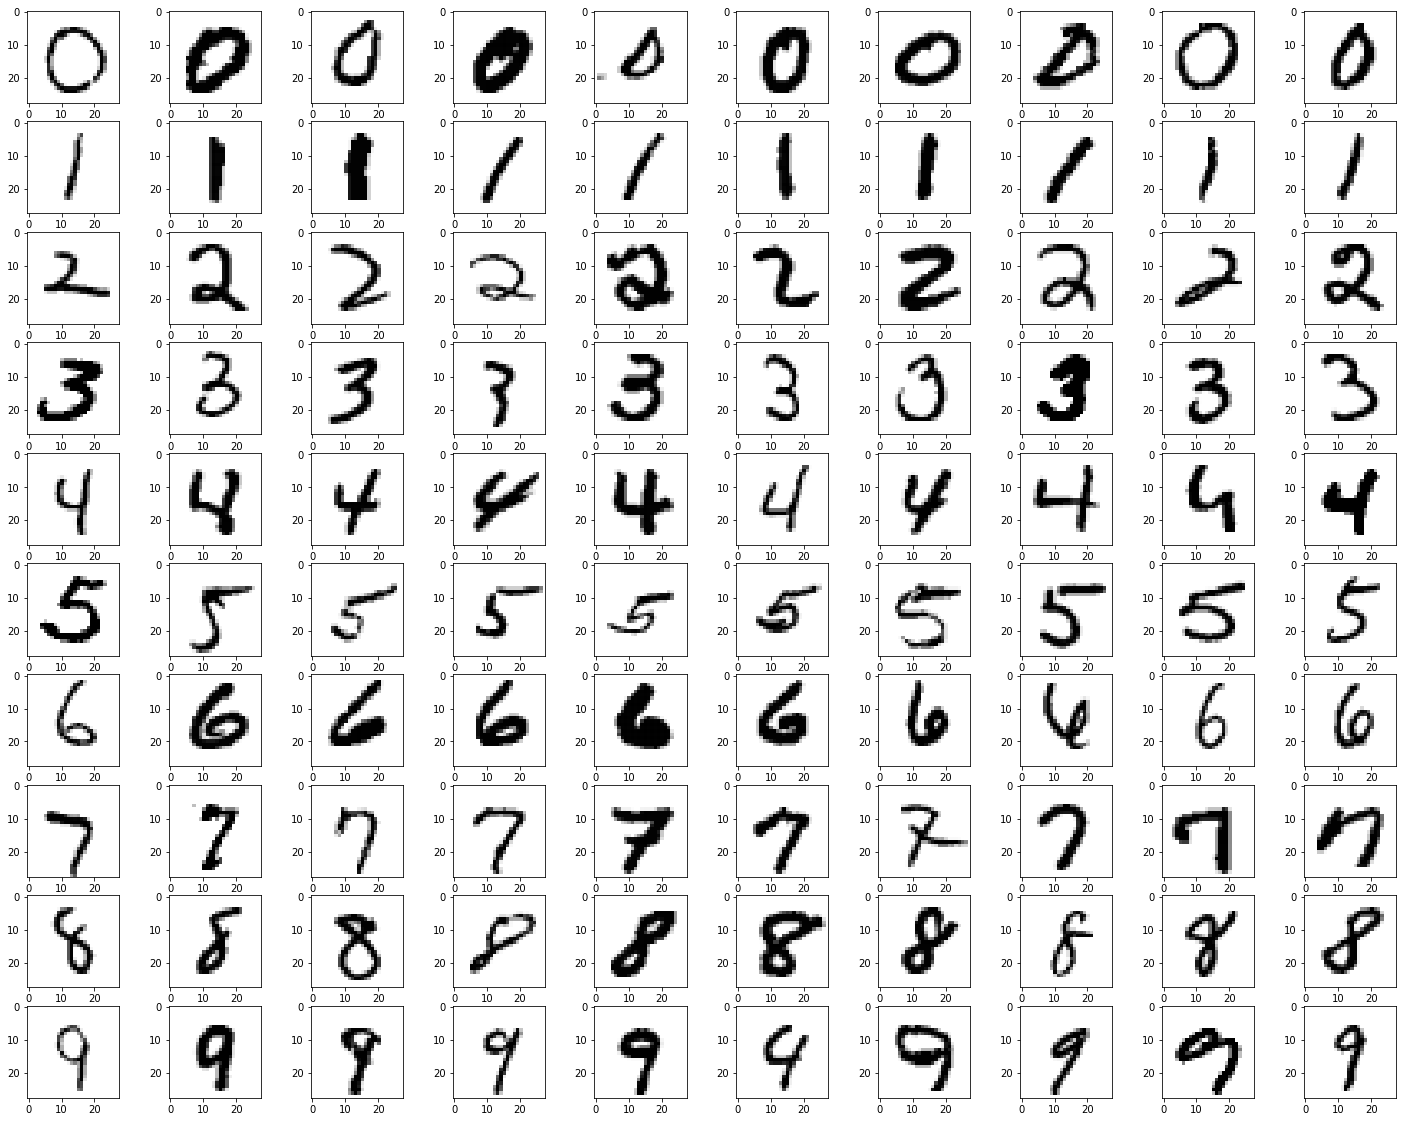

In [95]:
def P1(num_examples=10):
    
### STUDENT START ### 
    
    #set figure size of the image
    plt.figure(figsize = (25,20))
    
    # Set the colormap to black and white
    plt.rc('image', cmap='Greys')
    
    #count used for iteration
    count = 0
    
    #for loops used to iterate through the 1-9
    for label in range(num_examples):
        
        #i is set to index, that looks for location of labels
        i, = np.where(dev_labels==label)
        
        #loop through first 10 digits of index i
        for digit in i[:10]:
            
            count += 1
            
            #subplot set with dimensions
            plt.subplot(10,10,count)
            
            #image reshaped
            plt.imshow(dev_data[digit].reshape((28,28)),cmap = plt.cm.gray_r)


### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [81]:
def P2(k_values):
    

    #use KNeighborsClassifier with fit
    knn = KNeighborsClassifier(n_neighbors = k_values).fit(mini_train_data, mini_train_labels)
    
    #rename predicted labels
    test_predicted_labels = knn.predict(dev_data)
   
    #discovering accuracy which is based on predicted vs dev labels
    wrong_prediction = (test_predicted_labels != dev_labels)
    print("A k value of " + str(k_values) + " produces this many wrong predictions:", np.sum(wrong_prediction))
    
    #classification report delcaration
    report = classification_report(dev_labels, test_predicted_labels, target_names= None)
    print(report)



k_values = [1, 3, 5, 7, 9]

#print all classification reports for each k_value
for i in k_values:
    P2(i)

A k value of 1 produces this many wrong predictions: 112
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

A k value of 3 produces this many wrong predictions: 122
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84  

ANSWER:
The classification reports for each of the k_values are listed below. 

Based on the output, the f1-score provides a harmonic mean between precision and recall. For each K-value, it seems like the number 9 has the lowest f1-score. Based on that output, my answer would be the digit 9 is the most difficult. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [84]:
def P3(train_sizes, accuracies):
    
    #start time
    start = time.time()
    
    #rename 
    train_size_data, train_size_label = X[:train_sizes], Y[:train_sizes]
    
     #use KNeighborsClassifier with fit
    knn = KNeighborsClassifier(n_neighbors = 1).fit(train_size_data, train_size_label)
    
    #rename predicted labels
    size_predicted_labels = knn.predict(dev_data)
    
    #calculaton of accuracy
    wrong_prediction = (size_predicted_labels != dev_labels)
    wrongNum = np.sum(wrong_prediction)
    total = np.sum(dev_labels)
    accuracy = (total - wrongNum)/total
    
    #stop start time
    sizeTime = time.time() - start
    
    #print out size, accuracy, time
    print("Training Size: " + str(train_sizes) + "   Accuracy: %.2f" %accuracy 
          + "   Time Needed: %.2f seconds" %sizeTime)
    



train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 2500]


accuracies = []
for i in train_sizes:
    P3(i, accuracies)

Training Size: 100   Accuracy: 0.94   Time Needed: 0.16 seconds
Training Size: 200   Accuracy: 0.95   Time Needed: 0.25 seconds
Training Size: 400   Accuracy: 0.96   Time Needed: 0.48 seconds
Training Size: 800   Accuracy: 0.97   Time Needed: 0.92 seconds
Training Size: 1600   Accuracy: 0.98   Time Needed: 1.90 seconds
Training Size: 3200   Accuracy: 0.98   Time Needed: 3.79 seconds
Training Size: 6400   Accuracy: 0.99   Time Needed: 7.94 seconds
Training Size: 12800   Accuracy: 0.99   Time Needed: 15.94 seconds
Training Size: 25000   Accuracy: 0.99   Time Needed: 32.72 seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [68]:
#def P4():

#n is the number of features


lr = LinearRegression(fit_intercept = True)
X = X[:60000]
Y = Y[:60000]

lr.fit(X,Y)

print(lr.intercept_)
print(lr.coef_)
print("Estimated function: y = %.2f + %.2fx" %(lr.intercept_, lr.coef_[0]))

#P4()

2.97118488857
[  4.96682420e+07   3.68578143e+11   7.17636691e+11   1.37681481e+11
  -6.97862517e+10   2.03285356e+11  -5.16767814e+10  -4.76781578e+11
  -9.56028131e+11  -8.50228302e+11   3.09385161e+11  -2.83985410e+11
   3.72032729e+11  -1.27297646e+11   1.15699015e+11  -1.35002549e+11
  -4.84681263e+11   3.59383617e+10   8.26534069e+10   7.26543912e+10
  -5.34438897e+10   9.71966867e+10   9.52499522e+10  -4.57702886e+10
   3.56928309e+10  -6.47348168e+10   1.10089660e+10  -6.48662228e+10
  -4.28839214e+10   8.37258511e+10   6.38998853e+10   1.04863475e+10
   3.47882964e+10  -5.86796758e+01   6.71089388e+00  -2.94285832e+00
   4.29004043e-01   6.64379895e-01  -1.72866225e-01   2.45846391e-01
  -2.74071574e-01   3.23732018e-01  -1.11290216e-02   5.87624550e-01
  -6.93793178e-01   3.68384004e-01   2.41250753e-01   3.64267230e-02
   4.29041505e-01   7.42472857e-01  -1.60944518e+00   2.33991987e+00
   1.31876407e+10  -3.92727446e+10  -3.34035312e+09   2.26291738e+10
  -1.29490448e+08  -

ANSWER:  

Main drawback, unlikely to produce the best predictive accuracy compared to other models. Thats bc the regression assumes a linear response between features and response. If the realtionship is non linear, linear regression will be unable to effectively model the relationship and thus the predictions will not be accurate. You can probably apply a polynomial transformation which can fit more complex functions. 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      

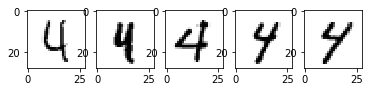

In [4]:
def P5():
    #use KNeighborsClassifier with fit
    knn = KNeighborsClassifier(n_neighbors = 1).fit(mini_train_data, mini_train_labels)  
    #rename predicted labels
    test_predicted_labels = knn.predict(dev_data) 
    print(confusion_matrix(dev_labels, test_predicted_labels))
    print(classification_report(dev_labels, test_predicted_labels, target_names= None))
    
    #i is set to index, that looks for location of labels
    i = 0 
    
    #plot number
    count = 1 
    while count <= 5:
    
        if dev_labels[i] == 4 and test_predicted_labels[i] == 9:
            

            #subplot set with dimensions
            plt.subplot(1,5,count)

            #image reshaped
            plt.imshow(dev_data[i].reshape((28,28)),cmap = plt.cm.gray_r)
            count += 1
            
        i += 1
P5()

Based on the confusion matrix and the classification report, we can see that the number '9' is one of the most confused digits, as well as the number '5'. 

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

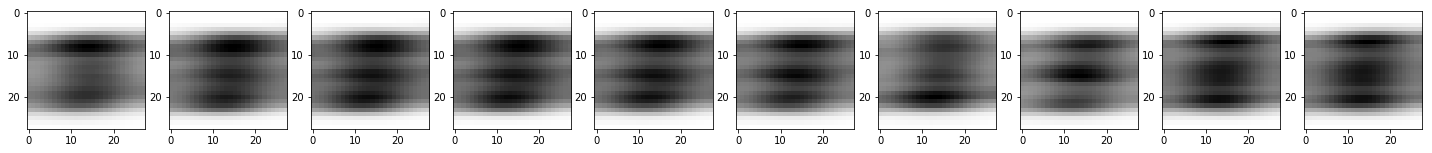

In [56]:
def P6():

    #import gaussian filter
    from scipy.ndimage import gaussian_filter


    blur_train_data = gaussian_filter(train_data, sigma=8)
    blur_dev_data  = gaussian_filter(dev_data, sigma=8)


    count = 0 

    plt.figure(figsize = (25,20))
    
    #plot label where train lavels = 5
    i, = np.where(train_labels==5)
    
    for digit in i[:10]:
        count += 1
        plt.subplot(1,10,count)
        plt.imshow(blur_train_data[digit].reshape((28,28)),cmap = plt.cm.gray_r)


    # clf.fit(dev_data, dev_labels)
    # accuracy = clf.score(test_data, test_labels)
    # print(accuracy)
    #knn = KNeighborsClassifier(n_neighbors = 8).fit(dev_data, dev_labels)  

    # def EuclideanDistance(v1, v2):
    #eucliedian distance to find the 8 closest
    #weight is based distance from the number
    #w = weights
    #training data
    #knn = KNeighborsClassifier(n_neighbors = 8).fit(train_data, train_labels)  



P6()

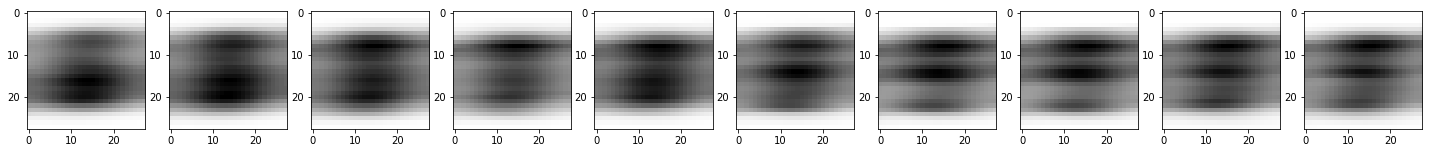

In [60]:
blur_dev_data = gaussian_filter(dev_data, sigma=8)
count = 0
plt.figure(figsize = (25,20))
i, = np.where(dev_labels==5)
for digit in i[:10]:
    count += 1
    plt.subplot(1,10,count)
    plt.imshow(blur_dev_data[digit].reshape((28,28)),cmap = plt.cm.gray_r)

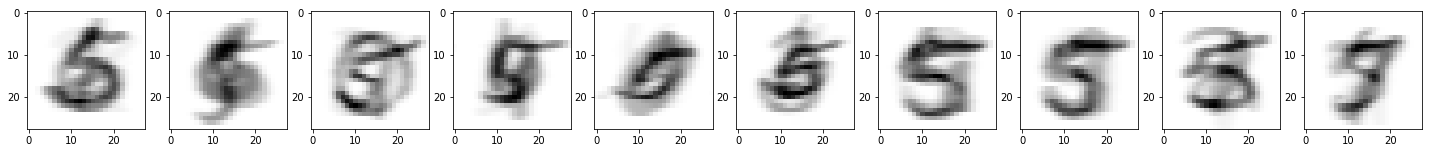

In [62]:
blur_dev_data = gaussian_filter(dev_data, sigma=1)
count = 0
plt.figure(figsize = (25,20))
i, = np.where(dev_labels==5)
for digit in i[:10]:
    count += 1
    plt.subplot(1,10,count)
    plt.imshow(blur_dev_data[digit].reshape((28,28)),cmap = plt.cm.gray_r)

ANSWER:
I tried playing around with the scipy image filters after trying pretty hard to figure out a way how to use the Eucleidian distance. I discovered had a huge impact on the blur factor and this was when sigma was increased. A jump from 0 to 1 saw a significant increase in blurness and a sigma of 8 was uncognizable. 


(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

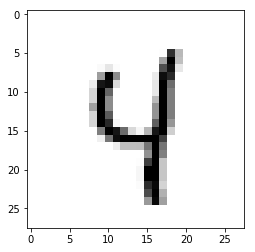

BernoulliNB Accuracy is: 0.85
MultiNomialNB Accuracy is: 0.83


In [31]:
def P7():
    
    binarized_data = np.zeros(dev_data.shape)
    for feature in range(dev_data.shape[1]):
        binarized_data[:,feature] = dev_data[:,feature]

    clf = BernoulliNB()
    clf.fit(binarized_data,dev_labels)
    plt.imshow(np.reshape(binarized_data[0,],(28,28)),cmap = plt.cm.gray_r)
    plt.show()
    print("BernoulliNB Accuracy is: %.2f" %clf.score(binarized_data, dev_labels))


    #how to map pizel values to 0, 1, 2

    multiNB = MultinomialNB()
    multiNB.fit(binarized_data, dev_labels)
    print("MultiNomialNB Accuracy is: %.2f" %multiNB.score(binarized_data, dev_labels))

P7()

In [64]:
binarized_data = np.zeros(train_data.shape)

for feature in range(train_data.shape[1]):
    binarized_data[:,feature] = train_data[:,feature]

print(binarized_data.shape)

(60000, 784)


ANSWER:

I was unable to figure out a way how to map pixels within the dev_data to effectively run the multinomialNB. A possible explanation of the MultinomialNB having lower accuract than BernoullinB is taht there could have been overfitting with the data in MultinomialNB thus forcing it to have lower accuracy. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
def P8(alphas):
    
    
    #GridSearchCV
    clf = BernoulliNB()
    CV = GridSearchCV(clf, alphas)
    CV.fit(mini_train_data, mini_train_labels)

    # Finding the accuracy when alpha=0
    clf = BernoulliNB(alpha=0)
    clf.fit(mini_train_data, mini_train_labels)
    print("Bernoulli Naive Bayes (alpha=0): ", clf.score(dev_data, dev_labels))
    
    return CV
    
    
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:820: RuntimeWarning: divi

Bernoulli Naive Bayes (alpha=0):  0.099


/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [10]:
print(nb.best_params_)

{'alpha': 0.1}


ANSWER:
The best value for alpha is 0.1, the accuracy when alpha is 0 is .099. this is lower than using an alpha of 1 because of the inclusion of a feature value probability of 0. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [70]:
#def P9():

gaussNB = GaussianNB()
gauss = gaussNB.fit(train_data, train_labels)
train_predicted_labels = gauss.predict(dev_data)
report = classification_report(dev_labels, train_predicted_labels, target_names= None)
print(report)
print('The Gaussian Score is:', gauss.score(dev_data, dev_labels))

norm_train_data = lambda x: (x - np.mean(train_data))/np.std(train_data)
norm_dev_data = lambda x: (x - np.mean(dev_data))/np.std(dev_data)


train_norm = norm_train_data(train_data)
train_dev = norm_dev_data(dev_data)
norm_gauss = GaussianNB()
norm_gauss.fit(train_norm, train_labels)
norm_predicted_labels = norm_gauss.predict(train_dev)
report = classification_report(dev_labels, norm_predicted_labels, target_names= None)
print(report)
print('The Gaussian Score is:', norm_gauss.score(train_dev, dev_labels))




# avgTrain = train_data.mean()
# stdTrain = train_data.std()
# # avgDev = dev_data.mean()
# stdDev = dev_data.std()

# avgTrain_labels = train_labels.mean()
# stdTrain_labels = train_labels.std()
# avgDev_labels = dev_labels.mean()
# stdDev_labels = dev_labels.std()

# new_train_data  = (train_data - avgTrain)/stdTrain
# new_dev_data  = (dev_data - avgDev)/stdDev

# new_train_labels = (train_labels - avgTrain_labels)/stdTrain_labels
# new_dev_labels  = (dev_labels - avgDev_labels)/stdDev_labels

# print(new_train_labels.shape)
# print(new_train_data.shape)
# print(stdTrain_labels)

#P9()

             precision    recall  f1-score   support

        0.0       0.72      0.97      0.83        99
        1.0       0.83      0.94      0.88       105
        2.0       0.90      0.25      0.40       102
        3.0       0.77      0.42      0.54        86
        4.0       0.85      0.21      0.34       104
        5.0       0.40      0.02      0.04        91
        6.0       0.66      0.94      0.78        98
        7.0       0.79      0.27      0.41       113
        8.0       0.33      0.70      0.45        96
        9.0       0.39      0.94      0.55       106

avg / total       0.67      0.57      0.52      1000

The Gaussian Score is: 0.571
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        99
        1.0       0.00      0.00      0.00       105
        2.0       0.12      0.99      0.21       102
        3.0       0.33      0.01      0.02        86
        4.0       0.00      0.00      0.00       104
        5.0  

/Users/pham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ANSWER:
I couldn't quite figure out what I did wrong here, I tried to normalize both the training sets. Then I tried to use that normalized data set and calculate a score that would represent accuracy. Unfortunately the score I generated was lower but this is another question I still need to spend some time on to figure out what is going on. 

Scratch Work:

gaussNB = GaussianNB()
newGNB = gaussNB.fit(new_train_data, new_train_labels)
dev_predicted_labels = gauss.predict(new_dev_data)
report = classification_report(dev_labels, dev_predicted_labels, target_names= None)
print(report)
print('The Gaussian Score is:', newGNB.score(new_dev_data, new_dev_labels))


varArr = gaussNB.sigma_
meanArr = gauss.theta_
stdArr = np.sqrt(varArr)
varArr.shape
new_train_data = (train_data - meanArr)/stdArr

need to do something to the data with theta and sigma to make the Gaussian
perform the same as Bernoulli

what should you do?
take theta and divide by sigma (mean/std deviation)
we need to translate it to the Z-score 
take each observation and subtract off the average and divide by the standard deviation



# Notes from Professor P9
Gaussian NB 
Target = Rose = {IS a rose, Is not a rose}
Observations (Training)= 100 flowers
Observations (Test) = 20 flowers
Features:
    - Smell(0,100)
    - Size (0,100)
    
Naive Bayes is looking for P(Rose = 1 | smell, size) = 
P(Small, Size | Rose = 1)*P(Rose = 1)
= P(Smell|Rose = 1)P(Size|Rose = 1) * P(Rose = 1)


We use GaussianNB when the features are continuous (non-binary)

WE use BernoulliNB when the features are binary (1,0)


Theta and Sigma in the fit method => theta = mean of each features per class
sigma = variance of each feature per class

Theta = mean(Size|Rose = 1),mean(Size|Rose = 0)
mean(Smell|Rose = 1), mean(Smell|Rose = 0)

Sigma = 
var(Size|Rose = 1),var(Size|Rose = 0)
var(Smell|Rose = 1), var(Smell|Rose = 0)

var(Size|Rose = 1):
the variance in the size among the roses. If it is low, they are close to the same size, if it is large, they are very different in size. 

std deviation = square root of variance


mean(Size) = 30
Size
12 - mean(size))/sqrt(variance(size))
34
65
78



(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

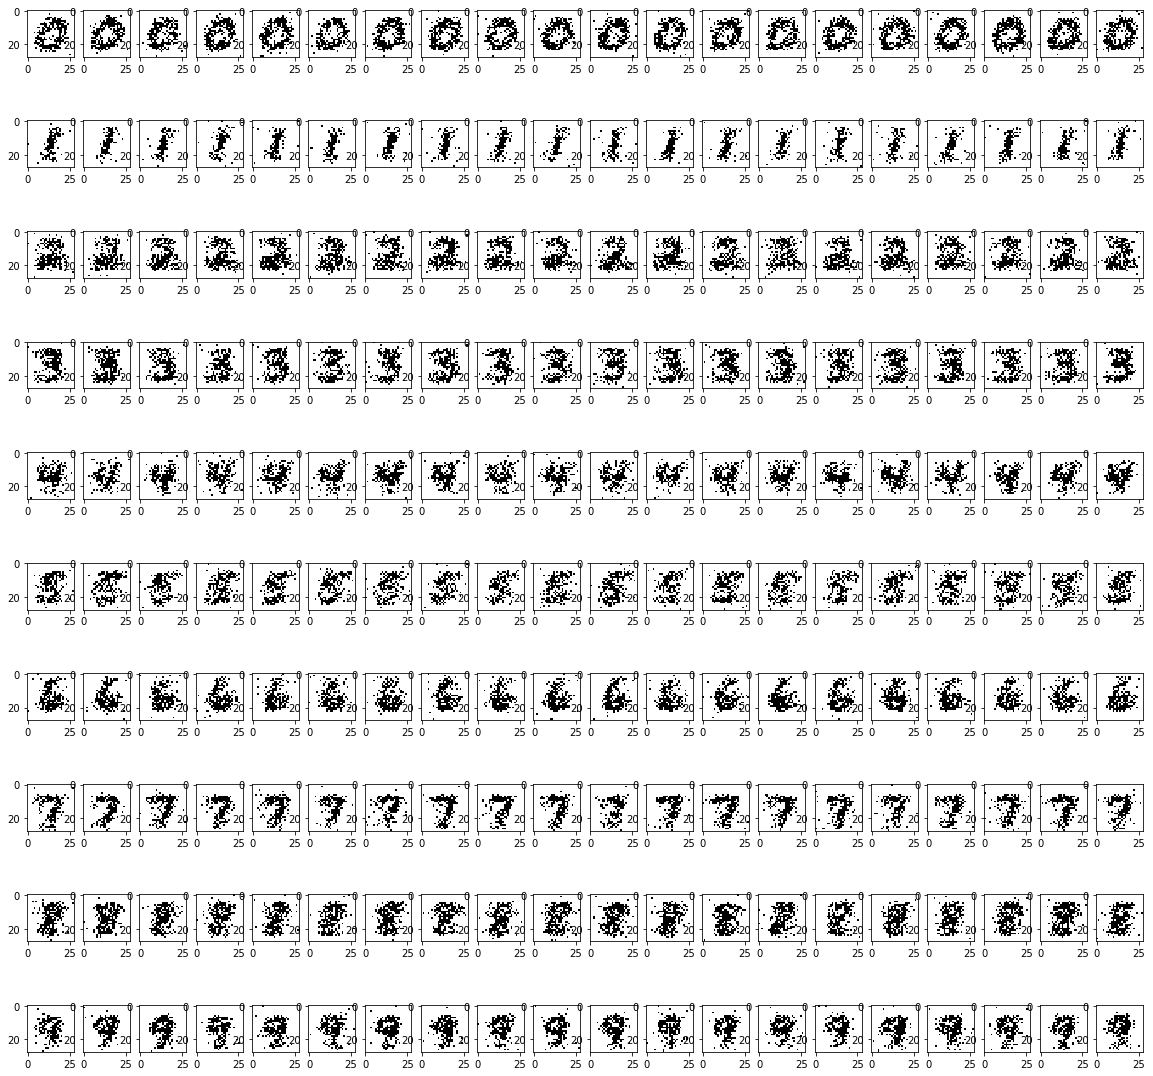

In [33]:
def P10(num_examples):

    plt.figure(figsize = (20,20))
    
    #train Bernoulli
    clf = BernoulliNB()
    clf.fit(mini_train_data, mini_train_labels)
    log_prob = clf.feature_log_prob_
    
    #Go through each label digit
    for label in range(10):
        
        
        for num in range(label*num_examples+1,(label+1)*num_examples + 1):
            
            #generate digit randomly and compare it to feature probability. If randomly selected
            #is smaller, then feature = 1. 
            gen_digits = np.random.rand(mini_train_data.shape[1]) < np.exp(log_prob[label,:])
            
            #plot
            plt.subplot(10, 20, num)
            plt.imshow(np.reshape(gen_digits,(28,28)),cmap = plt.cm.gray_r)
           


P10(20)

ANSWER:

It could be because I did something wrong, but the generated numbers seem more grainy than the training data set. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [21]:
def P11(buckets, correct, total):

    #train Bernoulli NB
    clf = BernoulliNB()
    clf.fit(mini_train_data,mini_train_labels)
    preds = clf.predict(dev_data)
    posterior_prob = clf.predict_proba(dev_data)


    #set predictions values
    for i,pred in zip(range(len(preds)), preds):

          #max posterior prob given prediction
            posterior = posterior_prob[i, int(pred)]

            # Find bucket where max posterior belongs
            # and update correct and total counters
            minRange = 0
            for r, bucket in zip(range(len(buckets)), buckets):
                if minRange < posterior and posterior <= bucket:
                    total[r] += 1
                    if pred == dev_labels[i]:
                        correct[r] += 1
                    break

                minRange = bucket


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]


P11(buckets, correct, total)

for i in range(len(buckets)):
   accuracy = 0.0
   if (total[i] > 0): accuracy = correct[i] / total[i]
   print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))


p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  28    accuracy = 0.536
p(pred) <= 0.9990000000000    total =  70    accuracy = 0.429
p(pred) <= 0.9999900000000    total =  59    accuracy = 0.508
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.571
p(pred) <= 0.9999999990000    total =  57    accuracy = 0.632
p(pred) <= 0.9999999999900    total =  66    accuracy = 0.712
p(pred) <= 0.9999999999999    total =  56    accuracy = 0.857
p(pred) <= 1.0000000000000    total = 601    accuracy = 0.953


# Notes from Professor P11
posterier probability of the predicted class => probability that the flower conditional upon the features is equal to some number

P(Rose = 1| Size, Smell) = x

If x > .5 then classify this observation as a Rose
Otherwise --> not Rose

Groups of roses that have a posterior probability between  
    Categories          Accuracy        N       Total#ofclass.Roses
0.90 <x<0.99               .90         10         roses = 60
0.80 < x < .90              .86         20         
.70 < x < .80               .75         30

#this is a strongly calibrated classifier


weakly calibrated:

    Categories          Accuracy
0.90 <x<0.99               .80
0.80 < x < .90              .70
.70 < x < .80               .60

#weakly calibrated classifier




 Categories          Accuracy
0.90 <x<0.99               .70
0.80 < x < .90              .70
.70 < x < .80               .71

#poorly calibrated classifier


For classified non-roses? x < 0.50

Categories            Accuracy
.00 <x < .10             .90
.10 < x < .20             .82
.20 < x < .30             .72

High true positive or low positive, false negative, 

if it is good at identying roses and not roses , it should be the case that the classifier does a better job in the group of roses than the group of roses in the .90 category than the other ones lower. 



alpha value is the laplace smoothing value in the previous problem set

bucket the categories


once you get the predicted probabilities, sort the data by the predicrted probabiltiies and calculate the accuracy within these buckets

take the feature log prob

take the exponent to get the correct probabiliy values


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()